In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

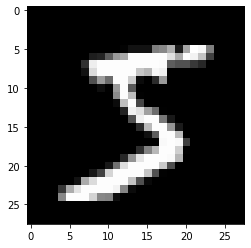

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
y_train[0]

5

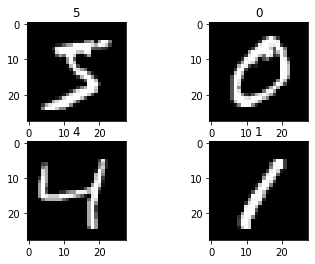

In [ ]:
plt.subplot(2,2,1)
plt.title(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.subplot(2,2,2)
plt.title(y_train[1])
plt.imshow(x_train[1], cmap='gray')
plt.subplot(2,2,3)
plt.title(y_train[2])
plt.imshow(x_train[2], cmap='gray')
plt.subplot(2,2,4)
plt.title(y_train[3])
plt.imshow(x_train[3], cmap='gray')

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
num_pixels = x_train.shape[1] * x_train.shape[2]

In [ ]:
num_pixels

784

In [ ]:
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
# normalize
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# Build model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(),
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 5s 14ms/step - loss: 1.3107 - accuracy: 0.7074 - val_loss: 0.7556 - val_accuracy: 0.8455
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.6374 - accuracy: 0.8577 - val_loss: 0.5171 - val_accuracy: 0.8784
Epoch 3/10
300/300 [==============================] - 8s 27ms/step - loss: 0.4929 - accuracy: 0.8785 - val_loss: 0.4323 - val_accuracy: 0.8929
Epoch 4/10
300/300 [==============================] - 7s 24ms/step - loss: 0.4290 - accuracy: 0.8891 - val_loss: 0.3869 - val_accuracy: 0.8991
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3918 - accuracy: 0.8956 - val_loss: 0.3581 - val_accuracy: 0.9066
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3663 - accuracy: 0.9012 - val_loss: 0.3382 - val_accuracy: 0.9103
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3474 - accuracy: 0.9060 - val_loss: 0.3227 - val_accuracy: 0.9122

In [ ]:
# Evaluate on test data
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 16s 2ms/step - loss: 0.2908 - accuracy: 0.9213


[0.2908188998699188, 0.9212999939918518]

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test),
          batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 13ms/step - loss: 0.3004 - accuracy: 0.9177 - val_loss: 0.2834 - val_accuracy: 0.9236
Epoch 2/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2921 - accuracy: 0.9198 - val_loss: 0.2761 - val_accuracy: 0.9250
Epoch 3/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2848 - accuracy: 0.9212 - val_loss: 0.2702 - val_accuracy: 0.9274
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2780 - accuracy: 0.9233 - val_loss: 0.2644 - val_accuracy: 0.9289
Epoch 5/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2718 - accuracy: 0.9248 - val_loss: 0.2589 - val_accuracy: 0.9295
Epoch 6/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2660 - accuracy: 0.9262 - val_loss: 0.2538 - val_accuracy: 0.9305
Epoch 7/10
300/300 [==============================] - 4s 13ms/step - loss: 0.2605 - accuracy: 0.9280 - val_loss: 0.2491 - val_accuracy: 0.9321

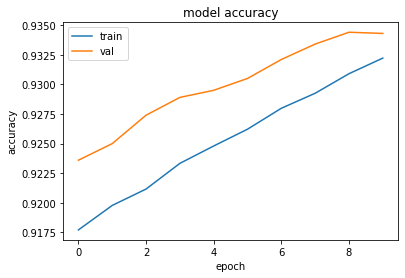

In [ ]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])